# Air Quality Index Visualization
The dataset that's used is the Indian Air Quality Datasets (2015-2020) from Kaggle. (https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india?select=city_day.csv)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Datasets\city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.isnull().sum() / len(df)

City          0.000000
Date          0.000000
PM2.5         0.155701
PM10          0.377231
NO            0.121296
NO2           0.121398
NOx           0.141715
NH3           0.349734
CO            0.069723
SO2           0.130507
O3            0.136196
Benzene       0.190410
Toluene       0.272290
Xylene        0.613220
AQI           0.158511
AQI_Bucket    0.158511
dtype: float64

In [4]:
# Since xylene contains +61% missing values I'll drop the column
df = df.drop(["Xylene"], axis=1)

# I'll also drop columns where there isnt AQI since its tedious
df = df.dropna(subset=["AQI"])

In [5]:
# Get all Cities
cities_list = [city for city in df["City"].drop_duplicates()]
print(cities_list)

['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']


In [6]:
# Get the mean of AQI of all 26 cities
cities_list_mean_AQI = []

for city in cities_list:
    cities_list_mean_AQI.append(df.loc[df["City"] == city, "AQI"].mean())

print(cities_list_mean_AQI)

[452.12293853073464, 34.765765765765764, 95.29964328180738, 119.92095914742451, 94.31832460732984, 132.8273381294964, 150.2805049088359, 96.49832775919732, 114.50265392781316, 73.02325581395348, 259.48774387193595, 92.359477124183, 225.12388162422573, 140.11111111111111, 109.20744680851064, 133.67915904936015, 159.25162127107652, 104.28481012658227, 140.56631299734747, 217.973058637084, 105.35225806451614, 240.7820424948595, 53.795121951219514, 172.88681948424068, 75.87832699619771, 117.26985482493595]


Text(0.5, 1.0, 'Mean AQI of Each Cities')

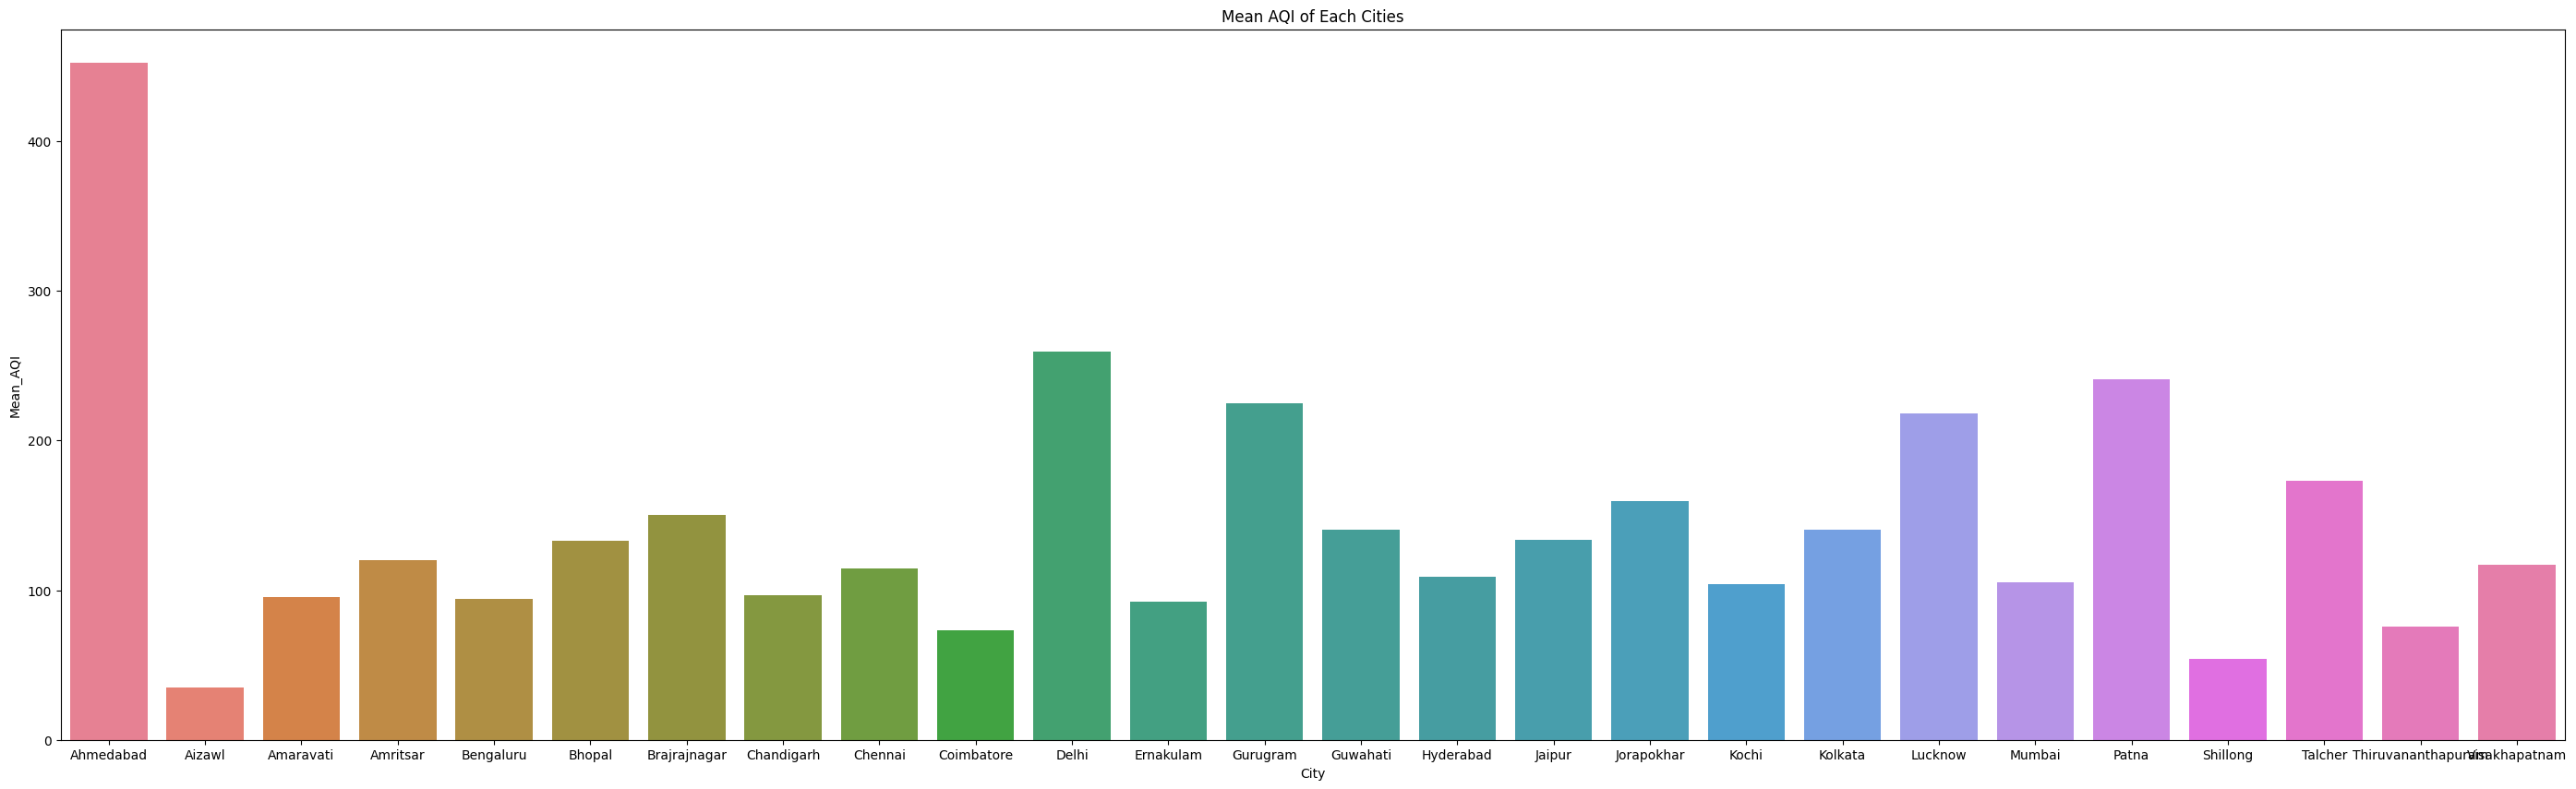

In [7]:
# Create new dataframe just for the cities and mean AQI
df_city_mean_AQI = pd.DataFrame({
    "City": cities_list,
    "Mean_AQI": cities_list_mean_AQI
})

# Visualize the mean AQI
plt.figure(figsize=(35,10))
sns.barplot(data=df_city_mean_AQI, x="City", y="Mean_AQI", hue='City')
plt.title("Mean AQI of Each Cities")

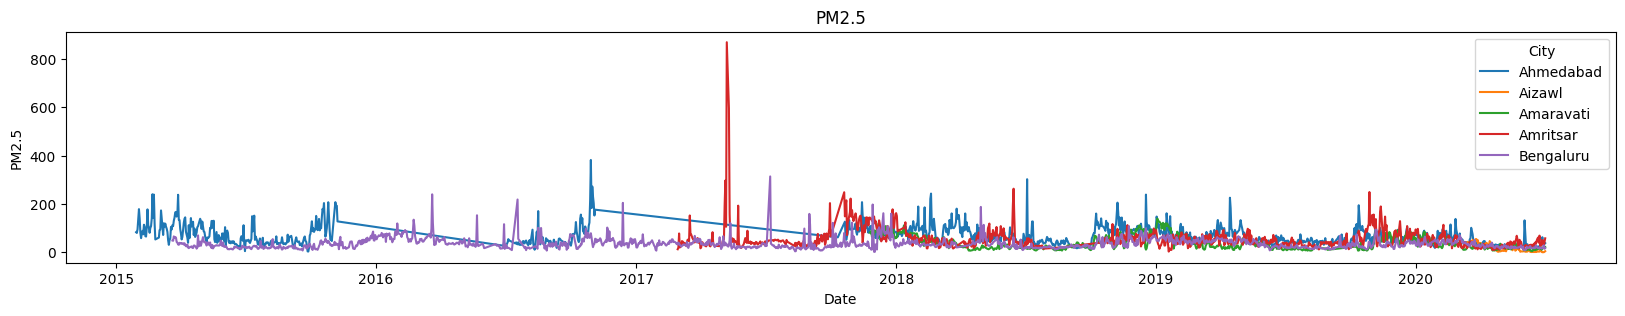

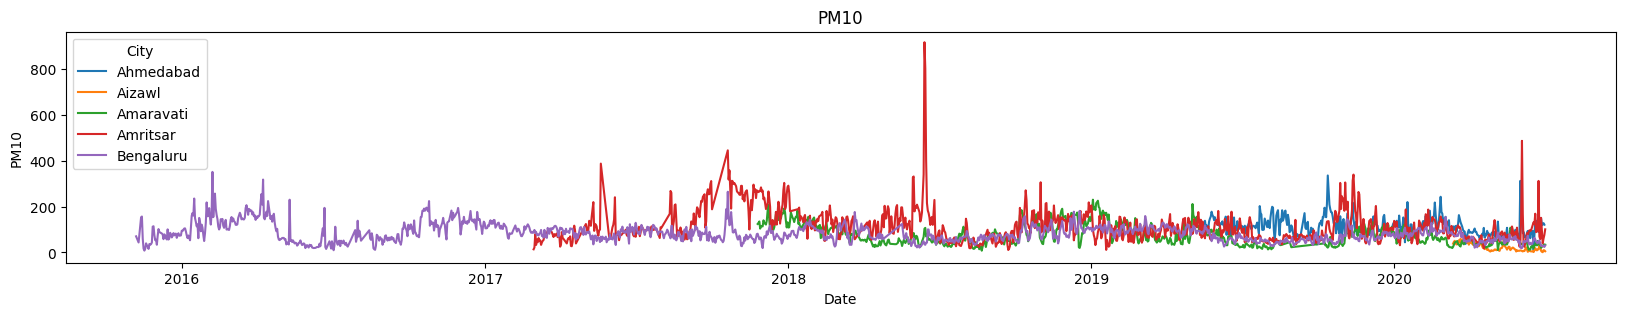

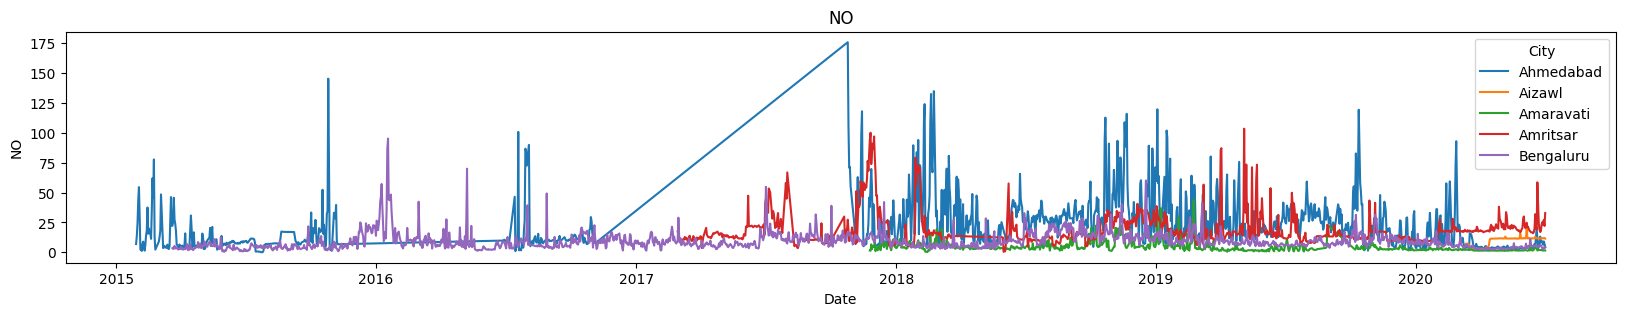

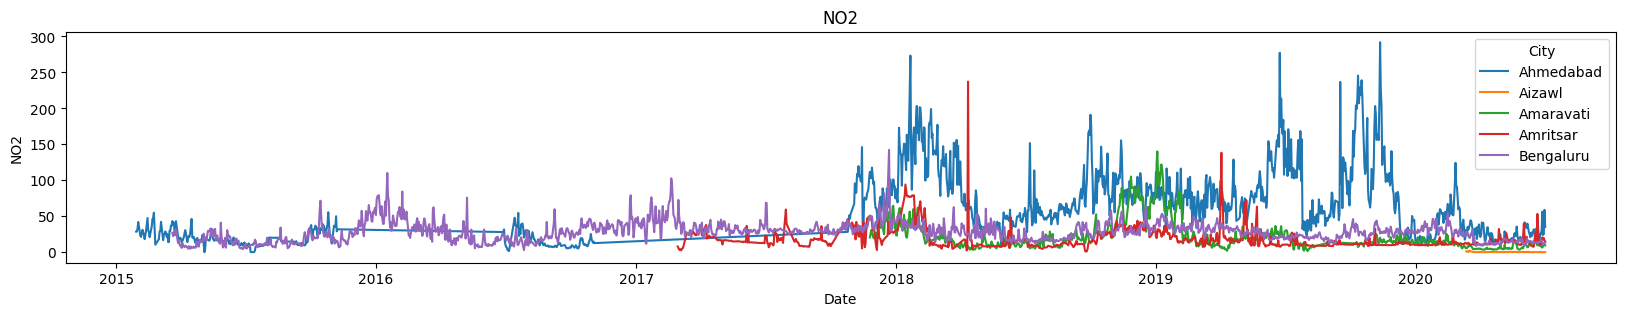

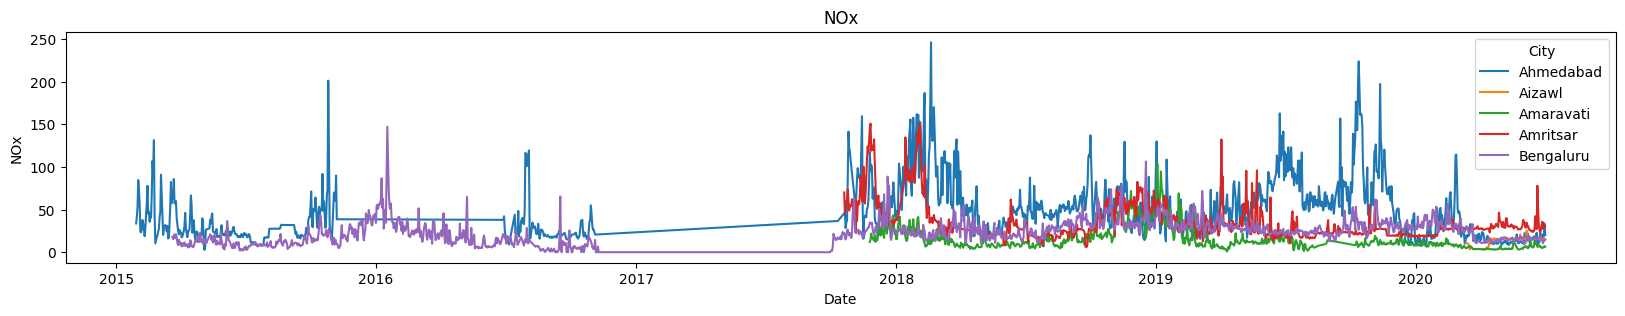

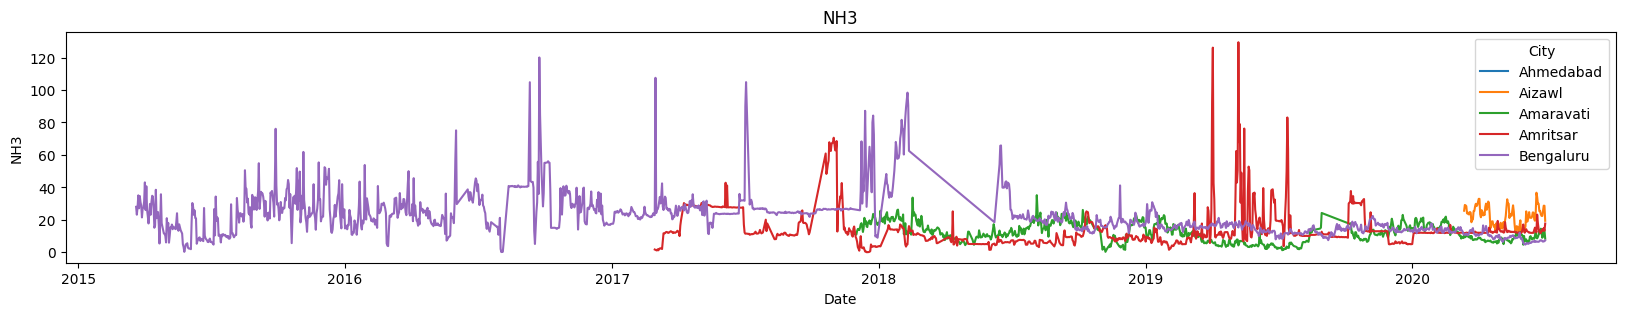

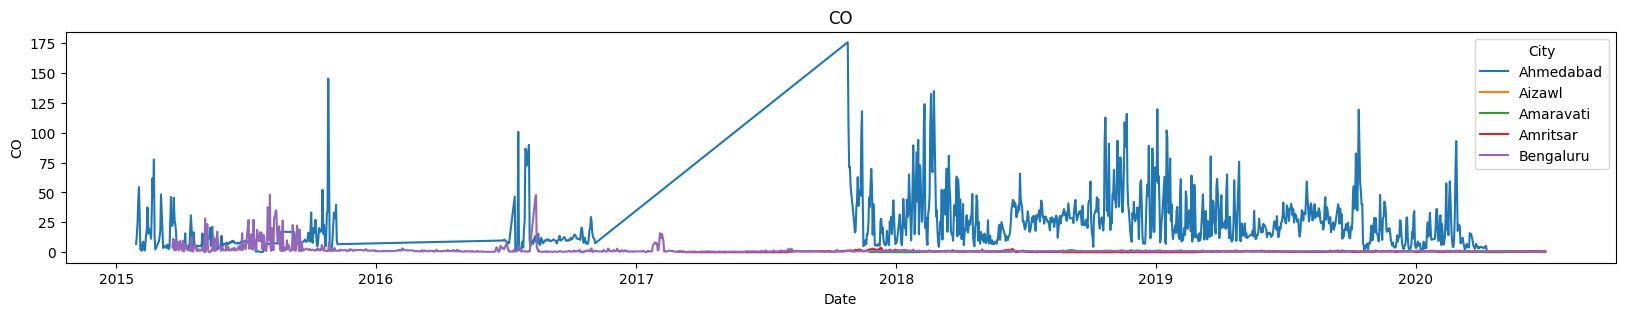

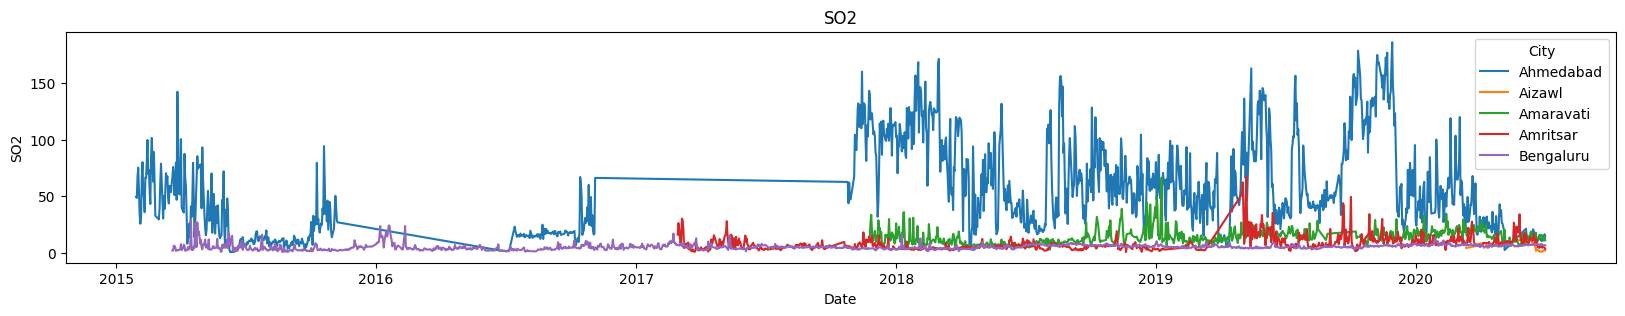

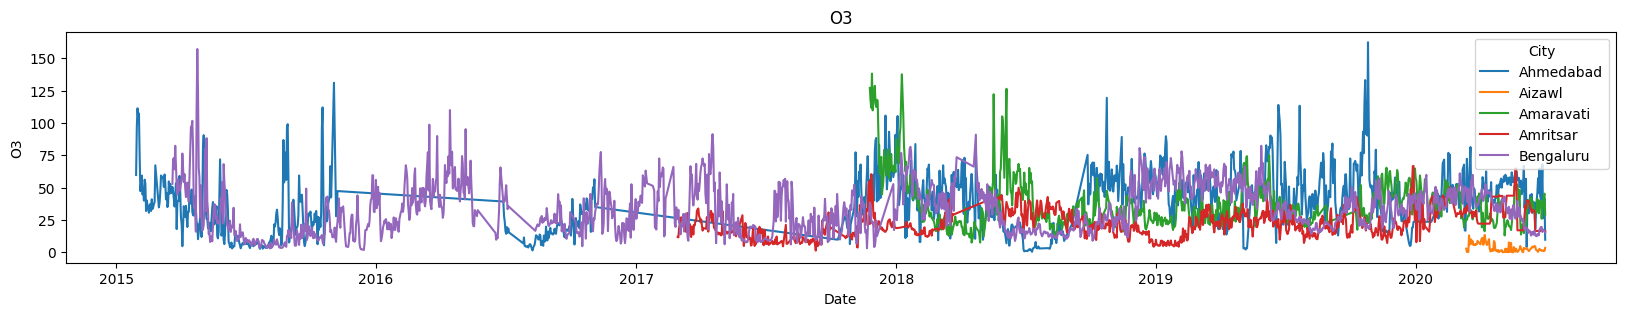

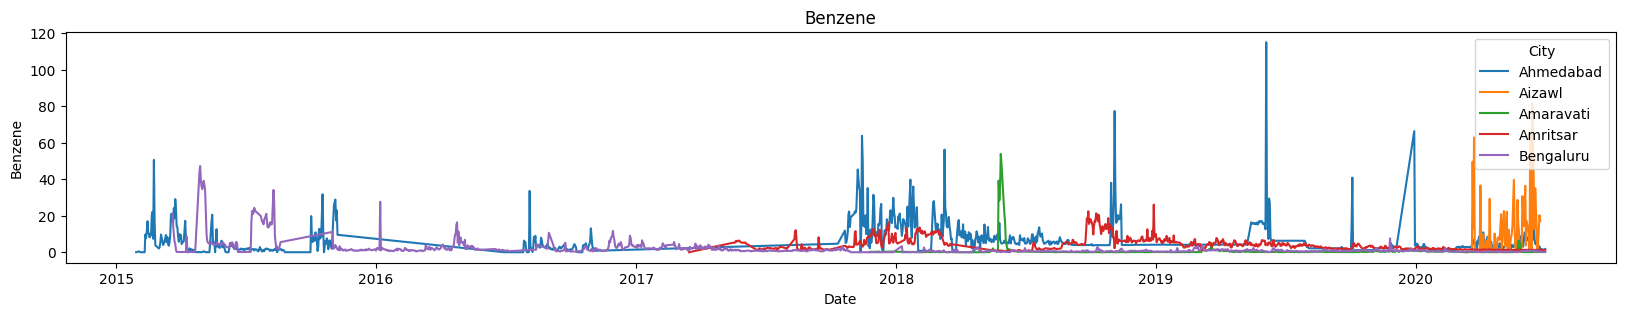

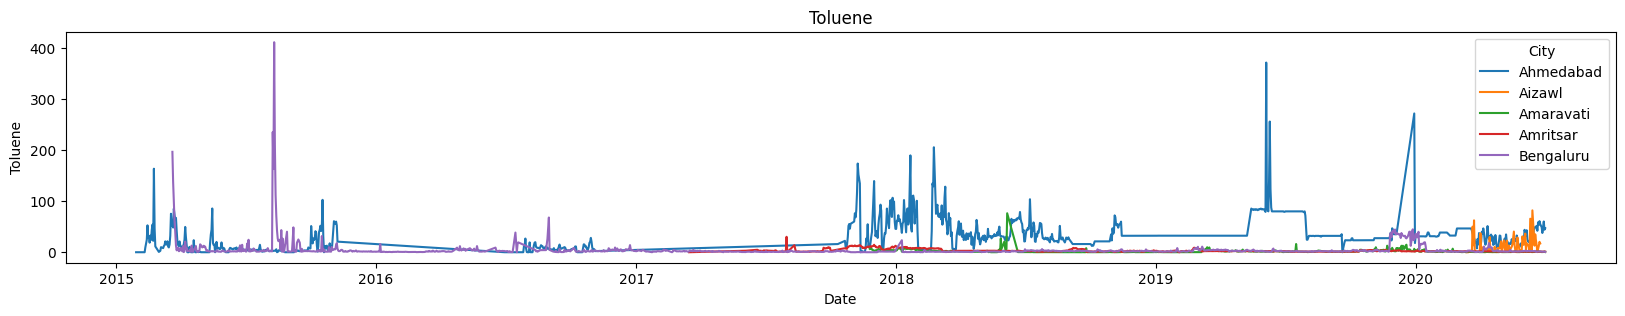

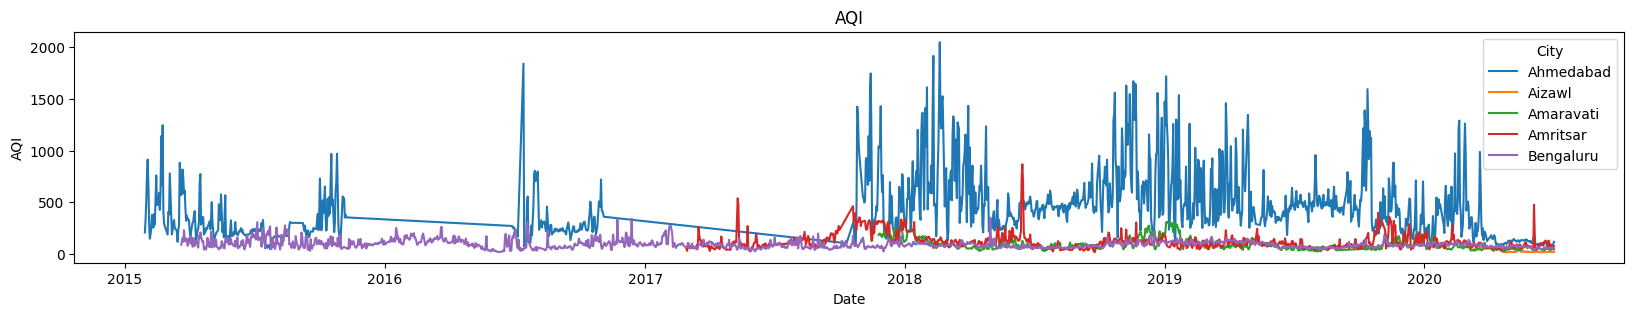

In [8]:
# Feature extraction to get a better understanding of the Missing Variables
# Set Date into a datetime format for visualization
df["Date"] = pd.to_datetime(df["Date"])

# Input features exclude AQI Bucket column; no need to append "City" and "Date" as they're already included
important_feat = [col for col in df.columns if not col.startswith("AQI_Bucket")]

# Take just 5 sampled cities data
df_sample_city = []
sampled_cities_list = cities_list[:5]

for city in sampled_cities_list:
    cur_df = df[df["City"] == city]
    cur_df = cur_df[important_feat]
    df_sample_city.append(cur_df)

df_sample_city = pd.concat(df_sample_city)

important_feat_only = [col for col in df.columns if not (col.startswith("AQI_Bucket") | col.startswith("Date") | col.startswith("City"))]

for col in important_feat_only:
    plt.figure(figsize=(20,3))
    sns.lineplot(data=df_sample_city, x='Date', y=col, hue='City')
    plt.title(f"{col}")

##### It can be Observed that the data for each of the sample cities starts at different Date's and the values that are missing doesnt have that much pattern in them so it can be concluded that the missing values are MCAR (Missing Completely At Random)

In [9]:
# I'll use the Mean of each column to substitute the NaN values (Though variance of said columns may hurt)

# Input features exclude AQI Bucket, City, and Date column
important_feat = [col for col in df.columns if not (col.startswith("AQI_Bucket") | col.startswith("City") | col.startswith("Date"))]

# Get just 5 sample cities and fill the missing values with its columns mean
df_sample_city = []
for city in sampled_cities_list:
    cur_df = df[df["City"] == city]
    cur_df = cur_df[important_feat]
    df_sample_city.append(cur_df.fillna(cur_df.mean()))

df_sample_city = pd.concat(df_sample_city)
df_sample_city.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3        1334
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
dtype: int64

In [10]:
# Still some nulls on the NH3 part
df_sample_city = df_sample_city.fillna(value=df_sample_city.mean())
df_sample_city.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

<Axes: >

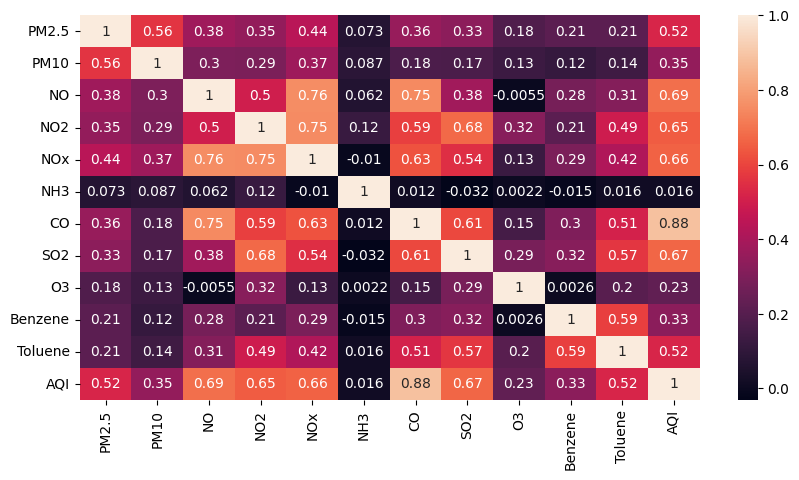

In [11]:
# Get the correlation between variables of the 5 sample cities
plt.figure(figsize=(10,5))
sns.heatmap(df_sample_city.corr(), annot=True)

<Axes: >

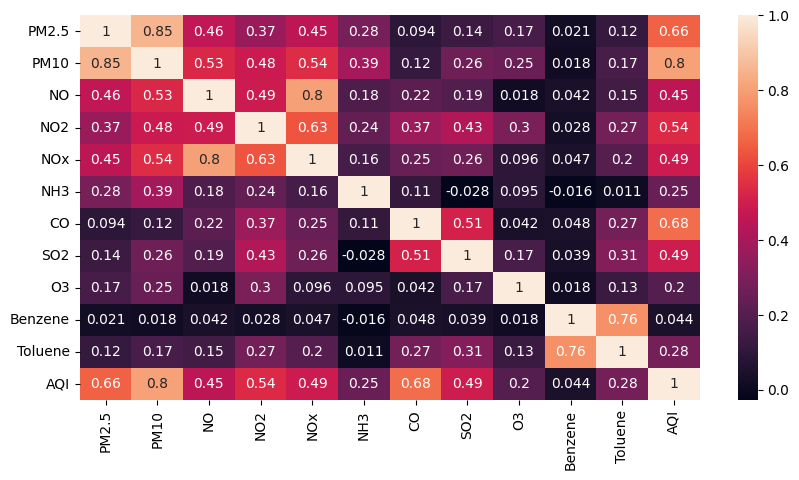

In [12]:
# Get the correlation between variables of all the citiies
df2 = df.drop(["City", "Date", "AQI_Bucket"], axis=1)
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True)

#### Seems that theres quite the difference in the 5 sample data and the total of 26 data by cities. Although some variables are still quite strong with their correlation to AQI, variables such as PM2.5, NO2, and CO with their correlation above 50%, theres also PM10 with a significant dropoff from 80% to 33%. Which leads me to beleive that in order to get the best results we need to process all 26 city datas instead of only taking the 5 city samples from it

In [13]:
# Store the datas in a list and only used the important columns only
df_cities = []
important_feat_only = [col for col in df.columns if not (col.startswith("AQI_Bucket") | col.startswith("City") | col.startswith("Date"))]

for city in cities_list:
    cur_df = df[df["City"] == city]
    cur_df = cur_df[important_feat_only]
    df_cities.append(cur_df.fillna(value=cur_df.median()))

df_cities = pd.concat(df_cities)
df_cities.isnull().sum()

PM2.5         0
PM10       1893
NO            0
NO2           0
NOx         771
NH3        1334
CO            0
SO2           0
O3          153
Benzene    2259
Toluene    4084
AQI           0
dtype: int64

In [14]:
# Still some missing values so I'll fill it with the mean of each column
df_cities = df_cities.fillna(value=df_cities.median())
df_cities.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

<Axes: >

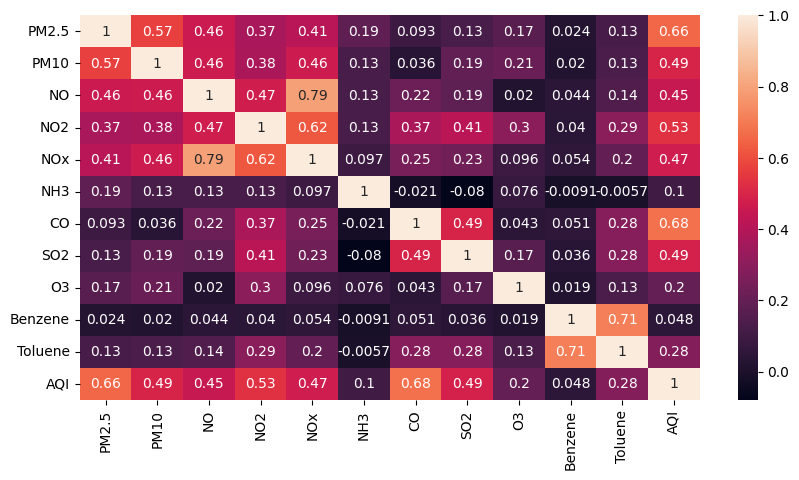

In [15]:
# Visualize the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_cities.corr(), annot=True)

In [17]:
df_cities.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,67.097109,62.285191,0.04,29.4800,49.240,79.5800,914.94
PM10,24850.0,113.434930,78.581712,0.03,58.3225,100.140,134.2175,917.08
NO,24850.0,17.569894,22.268838,0.03,5.7100,9.950,20.0300,390.68
NO2,24850.0,28.761585,24.521451,0.01,11.8325,21.845,37.9375,362.21
NOx,24850.0,31.671709,29.644130,0.00,14.0100,23.790,38.2100,378.24
NH3,24850.0,23.129938,22.764447,0.01,10.7400,17.055,29.5575,352.89
CO,24850.0,2.318160,7.019496,0.00,0.5800,0.920,1.4700,175.81
SO2,24850.0,14.406159,17.307963,0.01,5.7900,9.250,15.2200,186.08
O3,24850.0,34.736290,21.460501,0.01,19.4400,31.180,45.4100,257.73
Benzene,24850.0,3.136560,14.874703,0.00,0.2900,1.220,2.9600,455.03


In [16]:
df_cities.to_csv("./Output/New_Dataset/Processed_Dataset2.csv", sep=',', encoding='utf-8', index=False)

#### Conclusion: The variables that has the most impact are PM2.5, PM10, NO2, CO, and SO2 with a negative correlation, being the higher these variables are the worsen the AQI will be.